In [2]:
# Import library
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re
import seaborn as sns
import matplotlib.pyplot as plt


<h2> Preprocessing Playlist Data </h2>

In [3]:
playlist_songs = pd.read_csv('inputs/playlist_features.csv', converters= {'artist_genre': pd.eval})
playlist_songs

,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Red Lights,Tiësto,"[big room, brostep, dance pop, dutch edm, edm,...",70,0.654,0.830,10,-4.801,1,0.0366,0.000629,0.000001,0.1210,0.548,124.989,5L2l7mI8J1USMzhsmdjat9,262200,4
1,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,"[dance pop, edm, pop, pop rap]",79,0.664,0.714,7,-6.645,0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,0vbtURX4qv1l7besfwmnD8,197933,4
2,Pursuit Of Happiness - Extended Steve Aoki Remix,Kid Cudi,"[hip hop, ohio hip hop, rap]",78,0.722,0.687,0,-5.189,1,0.0556,0.009490,0.004130,0.0462,0.619,128.013,5PX4uS1LqlWEPL69phPVQQ,373627,4
3,More Than You Know,Axwell /\ Ingrosso,"[dance pop, edm, electro house, pop, pop dance...",82,0.646,0.741,5,-4.973,0,0.0340,0.027500,0.000000,0.3120,0.571,123.077,6h5PAsRni4IRlxWr6uDPTP,203000,4
4,I Could Be The One (Avicii Vs. Nicky Romero) -...,Avicii,"[dance pop, edm, pop, pop dance]",70,0.509,0.790,6,-3.782,0,0.0374,0.332000,0.000067,0.3160,0.638,127.946,1sh6lL6cmlcwhqZKGiKBua,208316,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Forever,Chris Brown,"[dance pop, pop, pop rap, r&b, rap]",77,0.672,0.820,11,-4.456,1,0.0459,0.036800,0.000188,0.1840,0.438,120.005,3NZJlJemX3mzjf56MqC5ML,278573,4
96,With You,Chris Brown,"[dance pop, pop, pop rap, r&b, rap]",73,0.662,0.693,3,-4.298,1,0.0698,0.134000,0.000000,0.1450,0.655,86.009,5Lgcn7u07bHuqbOtXkN62u,252120,4
97,So Sick,Ne-Yo,"[dance pop, pop, r&b, urban contemporary]",79,0.452,0.574,6,-8.336,1,0.3100,0.246000,0.000000,0.1890,0.580,92.791,6brl7bwOHmGFkNw3MBqssT,207187,4
98,Don't Lie,Black Eyed Peas,"[dance pop, pop, pop rap]",64,0.662,0.785,9,-5.299,1,0.1860,0.160000,0.000000,0.0784,0.604,89.885,6tp27J7xy18DQiQXut3GsF,219000,4


In [56]:
searchspace = pd.read_csv('inputs/searchspace.csv', converters= {'artist_genre': pd.eval})
searchspace

,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,We Don't Talk About Bruno,Carolina Gaitán - La Gaita,[],96,0.577,0.450,0,-8.516,0,0.0834,0.35700,0.000000,0.1110,0.8300,205.863,52xJxFP6TqMuO4Yt0eOkMz,216120,4
1,Super Gremlin,Kodak Black,"[florida rap, hip hop, melodic rap, miami hip ...",91,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,0.3570,0.1060,72.993,4A8cWXxKfIL3lAyUDzXbCF,200548,4
2,Surface Pressure,Jessica Darrow,[],92,0.650,0.584,2,-8.286,1,0.3070,0.01740,0.000002,0.0420,0.3700,180.088,760jhRscwGbIIe1m1IIQpU,202227,4
3,abcdefu,GAYLE,[modern alternative pop],100,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.4150,121.932,4fouWK6XVHhzl78KzQ1UjL,168602,4
4,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,"[modern rock, rock]",98,0.728,0.783,11,-4.424,0,0.2660,0.23700,0.000000,0.4340,0.5550,77.011,1r9xUipOqoNwggBpENDsvJ,173381,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Come Over (Again),Crawlers,[warrington indie],77,0.498,0.713,2,-7.738,1,0.0278,0.00393,0.000000,0.0675,0.2350,93.018,4PDJDIdWxNN1AlnbrKkoPf,254419,4
996,I Don't Do Drugs (feat. Ariana Grande),Doja Cat,"[dance pop, pop]",77,0.683,0.615,5,-5.737,1,0.0966,0.22200,0.000008,0.1540,0.4500,77.014,0FFsgUoFibYISzMxuGS61W,188893,4
997,No Lie,Sean Paul,"[dance pop, dancehall, pop, pop rap]",87,0.742,0.882,7,-2.862,1,0.1170,0.04660,0.000000,0.2060,0.4630,102.040,48QmG1dfvMuYLxMPt7KSRA,221176,4
998,STARGAZING,Travis Scott,"[rap, slap house]",78,0.487,0.789,8,-3.690,1,0.0440,0.00947,0.000004,0.1890,0.0564,150.007,7wBJfHzpfI3032CSD7CE2m,270715,4


Our first step is to be sure that there are no duplicated songs in this playlist, we can achieve this using pandas.

In [5]:
# Drop song duplicates
def drop_duplicates(df):
    '''
    Drop duplicate songs
    '''
    df['artists_song'] = df.apply(lambda row: row['artist_name']+row['track_name'],axis = 1)
    return df.drop_duplicates('artists_song')


In [6]:
songDF = drop_duplicates(playlist_songs)
#Drop the artists_song column created by the function
songDF = songDF.drop('artists_song', axis = 1 )
songDF

,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Red Lights,Tiësto,"[big room, brostep, dance pop, dutch edm, edm,...",70,0.654,0.830,10,-4.801,1,0.0366,0.000629,0.000001,0.1210,0.548,124.989,5L2l7mI8J1USMzhsmdjat9,262200,4
1,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,"[dance pop, edm, pop, pop rap]",79,0.664,0.714,7,-6.645,0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,0vbtURX4qv1l7besfwmnD8,197933,4
2,Pursuit Of Happiness - Extended Steve Aoki Remix,Kid Cudi,"[hip hop, ohio hip hop, rap]",78,0.722,0.687,0,-5.189,1,0.0556,0.009490,0.004130,0.0462,0.619,128.013,5PX4uS1LqlWEPL69phPVQQ,373627,4
3,More Than You Know,Axwell /\ Ingrosso,"[dance pop, edm, electro house, pop, pop dance...",82,0.646,0.741,5,-4.973,0,0.0340,0.027500,0.000000,0.3120,0.571,123.077,6h5PAsRni4IRlxWr6uDPTP,203000,4
4,I Could Be The One (Avicii Vs. Nicky Romero) -...,Avicii,"[dance pop, edm, pop, pop dance]",70,0.509,0.790,6,-3.782,0,0.0374,0.332000,0.000067,0.3160,0.638,127.946,1sh6lL6cmlcwhqZKGiKBua,208316,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Forever,Chris Brown,"[dance pop, pop, pop rap, r&b, rap]",77,0.672,0.820,11,-4.456,1,0.0459,0.036800,0.000188,0.1840,0.438,120.005,3NZJlJemX3mzjf56MqC5ML,278573,4
96,With You,Chris Brown,"[dance pop, pop, pop rap, r&b, rap]",73,0.662,0.693,3,-4.298,1,0.0698,0.134000,0.000000,0.1450,0.655,86.009,5Lgcn7u07bHuqbOtXkN62u,252120,4
97,So Sick,Ne-Yo,"[dance pop, pop, r&b, urban contemporary]",79,0.452,0.574,6,-8.336,1,0.3100,0.246000,0.000000,0.1890,0.580,92.791,6brl7bwOHmGFkNw3MBqssT,207187,4
98,Don't Lie,Black Eyed Peas,"[dance pop, pop, pop rap]",64,0.662,0.785,9,-5.299,1,0.1860,0.160000,0.000000,0.0784,0.604,89.885,6tp27J7xy18DQiQXut3GsF,219000,4


I also noted that the time_signature seems to be 4 for all the entries, so this gives us zero information. Just to be sure of that statment I will plot the column below:

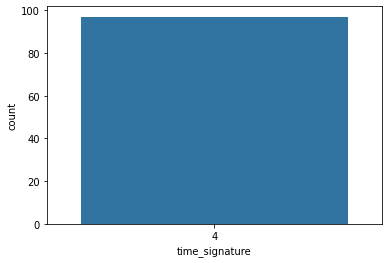

In [59]:
sns.countplot(x = 'time_signature', data = songDF)
plt.show()

In [60]:
songDF = songDF.drop(['time_signature'], axis = 1)
songDF.head()

,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Red Lights,Tiësto,"[big room, brostep, dance pop, dutch edm, edm,...",70,0.654,0.830,10,-4.801,1,0.0366,0.000629,0.000001,0.1210,0.548,124.989,5L2l7mI8J1USMzhsmdjat9,262200
1,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,"[dance pop, edm, pop, pop rap]",79,0.664,0.714,7,-6.645,0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,0vbtURX4qv1l7besfwmnD8,197933
2,Pursuit Of Happiness - Extended Steve Aoki Remix,Kid Cudi,"[hip hop, ohio hip hop, rap]",78,0.722,0.687,0,-5.189,1,0.0556,0.009490,0.004130,0.0462,0.619,128.013,5PX4uS1LqlWEPL69phPVQQ,373627
3,More Than You Know,Axwell /\ Ingrosso,"[dance pop, edm, electro house, pop, pop dance...",82,0.646,0.741,5,-4.973,0,0.0340,0.027500,0.000000,0.3120,0.571,123.077,6h5PAsRni4IRlxWr6uDPTP,203000
4,I Could Be The One (Avicii Vs. Nicky Romero) -...,Avicii,"[dance pop, edm, pop, pop dance]",70,0.509,0.790,6,-3.782,0,0.0374,0.332000,0.000067,0.3160,0.638,127.946,1sh6lL6cmlcwhqZKGiKBua,208316


The artist_genre column is composed by lists of the genres associated with the artists, the elements of the list are strings and I hope to apply TFIDF on them. This will create columns for each genre available in the database and for that to work properly I will have to replace the empty spaces of the strings, so that "big room" is understood as a single genre and not as "big" and "room". For that I will simply replace these spaces by an underscore.

In [61]:
def genre_preprocess(df):
    new = []
    for i in df['artist_genre']:
        aux = []
        for j in i:
            
            aux.append(j.replace(' ', '_'))
        new.append(aux)
    df['artist_genre'] = new
    return df


In [62]:
songDF = genre_preprocess(songDF)
songDF

,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Red Lights,Tiësto,"[big_room, brostep, dance_pop, dutch_edm, edm,...",70,0.654,0.830,10,-4.801,1,0.0366,0.000629,0.000001,0.1210,0.548,124.989,5L2l7mI8J1USMzhsmdjat9,262200
1,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,"[dance_pop, edm, pop, pop_rap]",79,0.664,0.714,7,-6.645,0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,0vbtURX4qv1l7besfwmnD8,197933
2,Pursuit Of Happiness - Extended Steve Aoki Remix,Kid Cudi,"[hip_hop, ohio_hip_hop, rap]",78,0.722,0.687,0,-5.189,1,0.0556,0.009490,0.004130,0.0462,0.619,128.013,5PX4uS1LqlWEPL69phPVQQ,373627
3,More Than You Know,Axwell /\ Ingrosso,"[dance_pop, edm, electro_house, pop, pop_dance...",82,0.646,0.741,5,-4.973,0,0.0340,0.027500,0.000000,0.3120,0.571,123.077,6h5PAsRni4IRlxWr6uDPTP,203000
4,I Could Be The One (Avicii Vs. Nicky Romero) -...,Avicii,"[dance_pop, edm, pop, pop_dance]",70,0.509,0.790,6,-3.782,0,0.0374,0.332000,0.000067,0.3160,0.638,127.946,1sh6lL6cmlcwhqZKGiKBua,208316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Forever,Chris Brown,"[dance_pop, pop, pop_rap, r&b, rap]",77,0.672,0.820,11,-4.456,1,0.0459,0.036800,0.000188,0.1840,0.438,120.005,3NZJlJemX3mzjf56MqC5ML,278573
96,With You,Chris Brown,"[dance_pop, pop, pop_rap, r&b, rap]",73,0.662,0.693,3,-4.298,1,0.0698,0.134000,0.000000,0.1450,0.655,86.009,5Lgcn7u07bHuqbOtXkN62u,252120
97,So Sick,Ne-Yo,"[dance_pop, pop, r&b, urban_contemporary]",79,0.452,0.574,6,-8.336,1,0.3100,0.246000,0.000000,0.1890,0.580,92.791,6brl7bwOHmGFkNw3MBqssT,207187
98,Don't Lie,Black Eyed Peas,"[dance_pop, pop, pop_rap]",64,0.662,0.785,9,-5.299,1,0.1860,0.160000,0.000000,0.0784,0.604,89.885,6tp27J7xy18DQiQXut3GsF,219000


The playlist is composed mostly of songs from the 2000s, so in comparison with our searchspace (songs from 2018-2021), those songs have, in general, longer duration. I don`t want the recommendation system to be biased by this difference, since I'm concerned only with the inherent characteristics of the songs, so I will drop this column.

Before that, I first plot an histogram with the duration_ms column for both dataframes and the mean duration of the songs to make sure my assumption is correct.

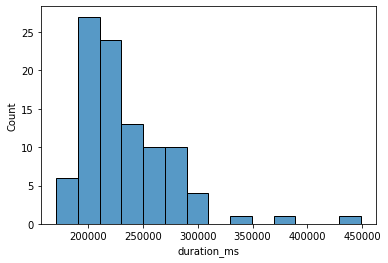

233847.71134020618

In [63]:
#Histplot for playlist songs
sns.histplot(x = 'duration_ms', data = songDF)
plt.show()
songDF['duration_ms'].mean()

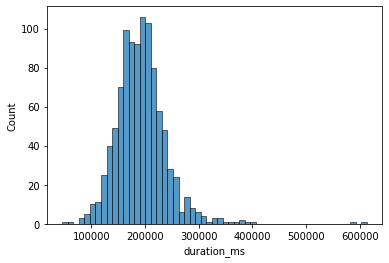

192778.214

In [64]:
#Histplot for searchspace
sns.histplot(x = 'duration_ms', data = searchspace)
plt.show()
searchspace['duration_ms'].mean()

In [65]:
songDF = songDF.drop(['duration_ms'], axis  = 1)

<h2> Feature generation </h2>

<h3> TFIDF </h3>

TF-IDF stands for Term Frequency-Inverse Document Frequency and it`s a tool to quantify the importance of a word in the documents and the corpus. To calculate this we take the product of the term frequency (number of times that a certain word appears in the document divided by the total word count of the document) and the Inverse Document Frequency (the log value of the document frequency - number of documents where one term is present).

$$TFIDF = tf_{x,y} \log{\frac{N}{df_{x}}}$$

where $tf_{x,y}$ represents the frequency of $x$ in $y$, $df_{x}$ is the number of documents containing $x$ and N is the total number of documents.

I will apply this metric to the artist_genre column to quatify the importance of each genre in our playlist.

In [8]:

# TF-IDF implementation
tfidf = TfidfVectorizer()
tfidf_matrix =  tfidf.fit_transform(songDF['artist_genre'].apply(lambda x: " ".join(x)))
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
#genre_df.drop(columns='genre|unknown') # Drop unknown genres
genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

genre|american    0.000000
genre|art         0.000000
genre|asian       0.000000
genre|atl         0.000000
genre|atlanta     0.000000
                    ...   
genre|tropical    0.218604
genre|uk          0.000000
genre|urban       0.000000
genre|viral       0.000000
genre|west        0.000000
Name: 0, Length: 67, dtype: float64

<h3> Sentiment Analysis  </h3>

For the categorical variables I will use a simple sentiment analysis using subjectivity and polarity from the TextBlob package.

$\textbf{Subjectivity(0,1)}$ - the amount of personal opinion and factual information contained in the text \
$\textbf{Polarity (-1,1)}$ - the degree of strong or clearly defined sentiment accounting for negation

After that we apply One-Hot Encoding to list the sentiment of the song titles as one of the input.

In [67]:
def getSubjectivity(text):
  '''
  Getting the Subjectivity using TextBlob
  '''
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  '''
  Getting the Polarity using TextBlob
  '''
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  '''
  Categorizing the Polarity & Subjectivity score
  '''
  if task == "subjectivity":
    
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(df, text_col):
  '''
  Perform sentiment analysis on text
  ---
  Input:
  df (pandas dataframe): Dataframe of interest
  text_col (str): column of interest
  '''
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [17]:
# Show result
sentiment = sentiment_analysis(songDF, "track_name")
sentiment.head()

,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,subjectivity,polarity
0,Red Lights,Tiësto,"[big room, brostep, dance pop, dutch edm, edm,...",70,0.654,0.830,10,-4.801,1,0.0366,0.000629,0.000001,0.1210,0.548,124.989,5L2l7mI8J1USMzhsmdjat9,low,Neutral
1,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,"[dance pop, edm, pop, pop rap]",79,0.664,0.714,7,-6.645,0,0.1110,0.035300,0.000008,0.0843,0.710,101.969,0vbtURX4qv1l7besfwmnD8,low,Neutral
2,Pursuit Of Happiness - Extended Steve Aoki Remix,Kid Cudi,"[hip hop, ohio hip hop, rap]",78,0.722,0.687,0,-5.189,1,0.0556,0.009490,0.004130,0.0462,0.619,128.013,5PX4uS1LqlWEPL69phPVQQ,low,Positive
3,More Than You Know,Axwell /\ Ingrosso,"[dance pop, edm, electro house, pop, pop dance...",82,0.646,0.741,5,-4.973,0,0.0340,0.027500,0.000000,0.3120,0.571,123.077,6h5PAsRni4IRlxWr6uDPTP,high,Positive
4,I Could Be The One (Avicii Vs. Nicky Romero) -...,Avicii,"[dance pop, edm, pop, pop dance]",70,0.509,0.790,6,-3.782,0,0.0374,0.332000,0.000067,0.3160,0.638,127.946,1sh6lL6cmlcwhqZKGiKBua,low,Neutral


<h3> One hot encoding </h3>

One hot encoding is a simple method to transform categorical variables into a machine-readable language. The result is a dataframe where the columns are the categorical variables and the entries are 0 or 1, depending whether we have occurence or not of the variable.

In [68]:
def ohe_prep(df, column, new_name): 
    ''' 
    Create One Hot Encoded features of a specific column
    ---
    Input: 
    df (pandas dataframe): Spotify Dataframe
    column (str): Column to be processed
    new_name (str): new column name to be used
        
    Output: 
    tf_df: One-hot encoded features 
    '''
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [19]:

# One-hot encoding for the subjectivity 
subject_ohe = ohe_prep(sentiment, 'subjectivity','subject')
subject_ohe.iloc[0]



subject|high      0
subject|low       1
subject|medium    0
Name: 0, dtype: uint8

<h3> Normalization   </h3>

Our numerical variables have different ranges which can cause bias if we use them as they are in our recommendation system. Also, since I will use cosine similarity function it is important that the variables are scaled between 0 and 1. To do this, I will simply the function MaxMinScaler from scikit learn.

In [20]:
# artist_pop distribution descriptive stats
print(songDF['popularity'].describe())

count    97.000000
mean     68.371134
std      20.160977
min       0.000000
25%      67.000000
50%      75.000000
75%      79.000000
max      85.000000
Name: popularity, dtype: float64


In [15]:
# Normalization


pop = songDF[["popularity"]].reset_index(drop = True)
scaler = MinMaxScaler()
pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
pop_scaled.head()

,popularity
0,0.821429
1,0.940476
2,0.928571
3,0.976190
4,0.821429


<h3> Final product </h3>

In [69]:
def create_feature_set(df, float_cols):
    '''
    Process spotify df to create a final set of features that will be used to generate recommendations
    ---
    Input: 
    df (pandas dataframe): Spotify Dataframe
    float_cols (list(str)): List of float columns that will be scaled
            
    Output: 
    final (pandas dataframe): Final set of features 
    '''
    
    # Tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['artist_genre'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    genre_df.reset_index(drop = True, inplace=True)
    
    # Sentiment analysis
    df = sentiment_analysis(df, "track_name")

    # One-hot Encoding
    subject_ohe = ohe_prep(df, 'subjectivity','subject') * 0.3
    polar_ohe = ohe_prep(df, 'polarity','polar') * 0.5
    key_ohe = ohe_prep(df, 'key','key') * 0.5
    mode_ohe = ohe_prep(df, 'mode','mode') * 0.5

    # Normalization
    # Scale popularity columns
    pop = df[["popularity"]].reset_index(drop = True)
    scaler = MinMaxScaler()
    pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns) * 0.2 

    # Scale audio columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    # Concanenate all features
    final = pd.concat([genre_df, floats_scaled, pop_scaled, subject_ohe, polar_ohe, key_ohe, mode_ohe], axis = 1)
    final['id']=df['id'].values
    
    
    return final

In [70]:
# Save the data and generate the features
float_cols = songDF.dtypes[songDF.dtypes == 'float64'].index.values
float_cols
songDF.to_csv("outputs/preprocessed_playlist_data.csv", index = False)

complete_feature_playlist = create_feature_set(songDF, float_cols=float_cols)
complete_feature_playlist.head()

,genre|art_pop,genre|asian_american_hip_hop,genre|atl_hip_hop,genre|barbadian_pop,genre|big_room,genre|brostep,genre|canadian_latin,genre|canadian_pop,genre|candy_pop,genre|chicago_bop,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.281489,0.392806,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,5L2l7mI8J1USMzhsmdjat9
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0vbtURX4qv1l7besfwmnD8
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,5PX4uS1LqlWEPL69phPVQQ
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,6h5PAsRni4IRlxWr6uDPTP
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1sh6lL6cmlcwhqZKGiKBua


In [72]:
#Save the features dataframe
complete_feature_playlist.to_csv("outputs/playlist_feature_data.csv", index = False)

<h2> Searchspace feature generation </h2>

Here I will just repeat the same steps for the searchspace database.

Drop the index columns and the time_signature.

In [74]:
searchspace = searchspace.drop(['time_signature', 'duration_ms'], axis = 1)
searchspace.head()


,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,We Don't Talk About Bruno,Carolina Gaitán - La Gaita,[],96,0.577,0.450,0,-8.516,0,0.0834,0.35700,0.000000,0.111,0.830,205.863,52xJxFP6TqMuO4Yt0eOkMz
1,Super Gremlin,Kodak Black,"[florida rap, hip hop, melodic rap, miami hip ...",91,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,0.357,0.106,72.993,4A8cWXxKfIL3lAyUDzXbCF
2,Surface Pressure,Jessica Darrow,[],92,0.650,0.584,2,-8.286,1,0.3070,0.01740,0.000002,0.042,0.370,180.088,760jhRscwGbIIe1m1IIQpU
3,abcdefu,GAYLE,[modern alternative pop],100,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.367,0.415,121.932,4fouWK6XVHhzl78KzQ1UjL
4,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,"[modern rock, rock]",98,0.728,0.783,11,-4.424,0,0.2660,0.23700,0.000000,0.434,0.555,77.011,1r9xUipOqoNwggBpENDsvJ


There`s missing data in the artist_genre column. I believe we don't have a huge amount of entries with an empty list, so I will just delete those and see how many we lost in the process.

In [75]:
searchspace['artist_genre']

0                                                     []
1      [florida rap, hip hop, melodic rap, miami hip ...
2                                                     []
3                               [modern alternative pop]
4                                    [modern rock, rock]
                             ...                        
995                                   [warrington indie]
996                                     [dance pop, pop]
997                 [dance pop, dancehall, pop, pop rap]
998                                    [rap, slap house]
999                                              [alt z]
Name: artist_genre, Length: 1000, dtype: object

In [76]:
searchspace = searchspace[searchspace['artist_genre'].map(lambda d: len(d)) > 0]
len(searchspace)

968

In [77]:
searchspace = genre_preprocess(searchspace)
searchspace

,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
1,Super Gremlin,Kodak Black,"[florida_rap, hip_hop, melodic_rap, miami_hip_...",91,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,0.3570,0.1060,72.993,4A8cWXxKfIL3lAyUDzXbCF
3,abcdefu,GAYLE,[modern_alternative_pop],100,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.4150,121.932,4fouWK6XVHhzl78KzQ1UjL
4,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,"[modern_rock, rock]",98,0.728,0.783,11,-4.424,0,0.2660,0.23700,0.000000,0.4340,0.5550,77.011,1r9xUipOqoNwggBpENDsvJ
5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,"[lgbtq+_hip_hop, pop]",95,0.736,0.704,3,-7.409,0,0.0615,0.02030,0.000000,0.0501,0.8940,149.995,27NovPIUIRrOZoCHxABJwK
6,Knife Talk (with 21 Savage ft. Project Pat),Drake,"[canadian_hip_hop, canadian_pop, hip_hop, rap,...",89,0.849,0.424,5,-9.579,0,0.3240,0.06350,0.000000,0.0834,0.1530,145.887,2BcMwX1MPV6ZHP4tUT9uq6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Come Over (Again),Crawlers,[warrington_indie],77,0.498,0.713,2,-7.738,1,0.0278,0.00393,0.000000,0.0675,0.2350,93.018,4PDJDIdWxNN1AlnbrKkoPf
996,I Don't Do Drugs (feat. Ariana Grande),Doja Cat,"[dance_pop, pop]",77,0.683,0.615,5,-5.737,1,0.0966,0.22200,0.000008,0.1540,0.4500,77.014,0FFsgUoFibYISzMxuGS61W
997,No Lie,Sean Paul,"[dance_pop, dancehall, pop, pop_rap]",87,0.742,0.882,7,-2.862,1,0.1170,0.04660,0.000000,0.2060,0.4630,102.040,48QmG1dfvMuYLxMPt7KSRA
998,STARGAZING,Travis Scott,"[rap, slap_house]",78,0.487,0.789,8,-3.690,1,0.0440,0.00947,0.000004,0.1890,0.0564,150.007,7wBJfHzpfI3032CSD7CE2m


Next I will drop the duplicated entries

In [78]:
searchspace = drop_duplicates(searchspace)
searchspace = searchspace.drop('artists_song', axis = 1 )
searchspace.head()

,track_name,artist_name,artist_genre,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
1,Super Gremlin,Kodak Black,"[florida_rap, hip_hop, melodic_rap, miami_hip_...",91,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.0,0.3570,0.106,72.993,4A8cWXxKfIL3lAyUDzXbCF
3,abcdefu,GAYLE,[modern_alternative_pop],100,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.0,0.3670,0.415,121.932,4fouWK6XVHhzl78KzQ1UjL
4,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,"[modern_rock, rock]",98,0.728,0.783,11,-4.424,0,0.2660,0.23700,0.0,0.4340,0.555,77.011,1r9xUipOqoNwggBpENDsvJ
5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,"[lgbtq+_hip_hop, pop]",95,0.736,0.704,3,-7.409,0,0.0615,0.02030,0.0,0.0501,0.894,149.995,27NovPIUIRrOZoCHxABJwK
6,Knife Talk (with 21 Savage ft. Project Pat),Drake,"[canadian_hip_hop, canadian_pop, hip_hop, rap,...",89,0.849,0.424,5,-9.579,0,0.3240,0.06350,0.0,0.0834,0.153,145.887,2BcMwX1MPV6ZHP4tUT9uq6


In [79]:
# Save the data and generate the features
float_cols = searchspace.dtypes[searchspace.dtypes == 'float64'].index.values
float_cols
searchspace.to_csv("outputs/preprocessed_searchspace.csv", index = False)

complete_feature_searchspace = create_feature_set(searchspace, float_cols=float_cols)
complete_feature_searchspace


Here, there is one more step to prepare the data to apply the cosine similarity. The above dataframe has way more columns than our playlist dataframe (saved before as 'playlist_feature_data.csv'), this happened for two reasons: first, the searchspace has way more entries than our playlist, which also means that we have a larger variety of genres, and second, there are genres in our playlist that might not be in the searchspace.

To deal with this problem, I wrote a simple function to compare the columns and drop those who are in the searchspace, but not in the playlist features, and add those that are in the playlist features but not in the searchspace as zero columns. At last, I reorder the searchspace columns to match the playlist`s.

In [84]:
def fix_columns(searchspace, playlist ):
    '''
    Make the columns from our searchspace the same as in our playlist features dataset
    ___
    Inputs
    searchspace - searchspace feature set
    playlist - playlist feature set
    '''

    for i in searchspace.columns.values:
        if i not in playlist.columns.values:
            searchspace = searchspace.drop(i, axis = 1)

    for j in playlist.columns.values:
        if j not in searchspace.columns.values:
            searchspace[j] = 0

    searchspace = searchspace[playlist.columns]
    return searchspace

In [85]:
complete_feature_searchspace = fix_columns(complete_feature_searchspace, complete_feature_playlist)
complete_feature_searchspace

,genre|art_pop,genre|asian_american_hip_hop,genre|atl_hip_hop,genre|barbadian_pop,genre|big_room,genre|brostep,genre|canadian_latin,genre|canadian_pop,genre|candy_pop,genre|chicago_bop,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,4A8cWXxKfIL3lAyUDzXbCF
1,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,4fouWK6XVHhzl78KzQ1UjL
2,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,1r9xUipOqoNwggBpENDsvJ
3,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,27NovPIUIRrOZoCHxABJwK
4,0.0,0,0.0,0,0.0,0.0,0,0.495077,0.0,0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,2BcMwX1MPV6ZHP4tUT9uq6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,4PDJDIdWxNN1AlnbrKkoPf
930,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0FFsgUoFibYISzMxuGS61W
931,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,48QmG1dfvMuYLxMPt7KSRA
932,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,7wBJfHzpfI3032CSD7CE2m


In [88]:
complete_feature_searchspace.to_csv("outputs/feature_searchspace.csv", index = False)

,genre|art_pop,genre|asian_american_hip_hop,genre|atl_hip_hop,genre|barbadian_pop,genre|big_room,genre|brostep,genre|canadian_latin,genre|canadian_pop,genre|candy_pop,genre|chicago_bop,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,4A8cWXxKfIL3lAyUDzXbCF
1,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,4fouWK6XVHhzl78KzQ1UjL
2,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,1r9xUipOqoNwggBpENDsvJ
3,0.0,0,0.0,0,0.0,0.0,0,0.000000,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,27NovPIUIRrOZoCHxABJwK
4,0.0,0,0.0,0,0.0,0.0,0,0.495077,0.0,0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,2BcMwX1MPV6ZHP4tUT9uq6
